In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import os
import sys
import matplotlib.ticker as ticker
from random import seed
from random import random
from random import randint
import random
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.copy_on_write = True

In [3]:
n =  100000

probs = [0.2, 0.5, 0.75]; ep = 0.1 # Bernoulli Example
#probs = [1.5, 2.5, 3.5]; ep = 0.1 # means for normal example
print("===  Bandit weigths", probs,"======")
dist = str(input("Probability distribution, Normal [n] or Bernoulli (binomial) [b]: "))

===  Bandit weigths [0.2, 0.5, 0.75] ======
Probability distribution, Normal [n] or Bernoulli (binomial) [b]: n


In [4]:
bandits = []; weights = []
for p in range (len(probs)):
    bandits.append(p)
c = random.choices(bandits); bandit = c[0]
print("Starting randomly on bandit",bandit," of ", bandits, " with value ", probs[bandit])

Starting randomly on bandit 2  of  [0, 1, 2]  with value  0.75


In [8]:
def bandit_choose(data):
    if (dist == "n") | (dist == "N"):
        win = np.random.randn() + probs[b]
    else:
        weight = 1 - probs[b]
        w= random.choices([0,1], weights=(weight,1-weight))
        win = w[0]
    return win

pulls = []
for i in range(1,n+1):
    for b in range (len(bandits)):
        win = bandit_choose(pulls)
        pulls.append(win)
pulls = np.reshape(pulls,(-1,len(probs)));

In [11]:
sums = [] # SUMMING THE BANDIT WINS
for i in range(len(probs)):
    sums.append(pulls[:,i].cumsum())
sums = np.reshape(sums,(len(probs),-1))
sums = sums.T
last = sums[-1]
print("Out of %d trials, wins are" %(n),last)
print("Best bandit is ", np.argmax(sums[b]), " with ", max(last), " wins")

Out of 100000 trials, wins are [19298.59670318 49859.91092033 74443.07836574]
Best bandit is  1  with  74443.07836573759  wins


In [12]:
wins = 0
results = []
e_n = 0
for i in range(0,n):
    maxsum = max(sums[i])
    maxb = np.argmax(sums[i]); #print(maxsum,maxb)
    prob = random.uniform(0, 1); # CHOOSE WIN/LOSE
    if prob < ep:  # LESS THAN EPSILON - SWITCH TO A RANDOM BANDIT
        c = random.choices(bandits); bandit = c[0]; 
        e_n = e_n+1 # KEEPING COUNT    
    else:  # MORE THAN EPSILON - STICK TO  CURRENT BANDIT (REWARD)
        bandit = maxb 
    win = bandit_choose(pulls)  # PLAY BANDIT
    wins = wins + win                            
    results.append(i+1); results.append(float(wins)/(i+1))
print("Number of wins:", wins)
print("Win rate:", float(wins)/n)
print("Number times explored:", e_n)
print("Number times exploited:", n-e_n)  
     
results = np.reshape(results,(-1,2))

Number of wins: 74899.24949811443
Win rate: 0.7489924949811443
Number times explored: 10064
Number times exploited: 89936


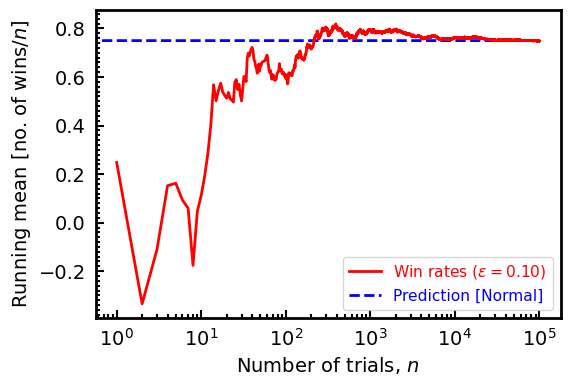

In [14]:
if (dist == "n") | (dist == "N"):
    name =  "Normal"
else:
    name = "Bernoulli"
    
font = 14
plt.rcParams.update({'font.size': font})
plt.figure(figsize = (6,4))
ax = plt.gca();
plt.setp(ax.spines.values(), linewidth=2)
ax.tick_params(direction='in', pad = 7,length=6, width=1.5, which='major') #,right=True,top=True)
ax.tick_params(direction='in', pad = 7,length=3, width=1.5, which='minor')

x = results[:,0]; y =  results[:,1]
plt.plot(x,y, lw = 2, ls = "-", c = "r", zorder = 2,label = "Win rates ($\epsilon = %1.2f$)" %(ep))
plt.plot(np.ones(n)*np.max(probs), lw = 2, ls = "dashed", c = "b", zorder = 1, label = "Prediction [%s]" %(name))

ax.set_xscale('log')
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))
ax.set_xlabel(r"Number of trials, $n$", size =font);
ax.set_ylabel(r"Running mean [no. of wins/$n$]", size =font);
    
plt.legend(fontsize = 0.8*font,labelcolor='linecolor')